# Predicting If A Client Has Subscribed To Term Life Insurance Or Not As A Part Of Telemarketing Campaign

Attribute information For bank dataset

   Input variables:
   ## Bank client data:
   1 - age (numeric)
   
   2 - job : type of job (categorical: "admin", "unknown", "unemployed", "management", "housemaid", "entrepreneur", "student",
                                       "blue-collar", "self-employed", "retired", "technician", "services") 
                                       
   3 - marital : marital status (categorical: "married", "divorced", "single"; note: "divorced" means divorced or widowed)
   
   4 - education (categorical: "unknown", "secondary", "primary", "tertiary")
   
   5 - default: has credit in default? (binary: "yes", "no")
   
   6 - balance: average yearly balance, in euros (numeric) 
   
   7 - housing: has housing loan? (binary: "yes", "no")
   
   8 - loan: has personal loan? (binary: "yes", "no")
   
   ## Related with the last contact of the current campaign:
   9 - contact: contact communication type (categorical: "unknown", "telephone", "cellular")
   
   10 - day: last contact day of the month (numeric)
   
   11 - month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")
   
   12 - duration: last contact duration, in seconds (numeric)
   
   ## Other attributes:
  13 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
  
  14 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)
  
  15 - previous: number of contacts performed before this campaign and for this client (numeric)
  
  16 - poutcome: outcome of the previous marketing campaign (categorical: "unknown", "other", "failure", "success")

  ## Output variable (desired target):
  17 - y - has the client subscribed a term deposit? (binary: "yes", "no")

Missing Attribute Values: None

In [1]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("bank-full.csv", delimiter = ';')

In [3]:
data.head()

age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome   y  
0  unknown    5   may       261         1     -1         0  unknown  no  
1  unknown    5   may       151         1     -1         0  unknown  no  
2  unknown    5   may        76         1     -1         0  unknown  no  
3  unknown    5   may        92         1     -1         0  unknown  no  
4  unknown    5   may       198         1     -1         0  unknown  no

In [4]:
data.shape

(45211, 17)

##### There are 45211 rows and 17 colums.

In [5]:
data.isna().sum().sum()

0

##### There are no missing values in the dataset.

In [6]:
data.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

In [7]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

#### Let's see the descriptive analysis of numerical columns

In [8]:
data.describe()

age        balance           day      duration      campaign  \
count  45211.000000   45211.000000  45211.000000  45211.000000  45211.000000   
mean      40.936210    1362.272058     15.806419    258.163080      2.763841   
std       10.618762    3044.765829      8.322476    257.527812      3.098021   
min       18.000000   -8019.000000      1.000000      0.000000      1.000000   
25%       33.000000      72.000000      8.000000    103.000000      1.000000   
50%       39.000000     448.000000     16.000000    180.000000      2.000000   
75%       48.000000    1428.000000     21.000000    319.000000      3.000000   
max       95.000000  102127.000000     31.000000   4918.000000     63.000000   

              pdays      previous  
count  45211.000000  45211.000000  
mean      40.197828      0.580323  
std      100.128746      2.303441  
min       -1.000000      0.000000  
25%       -1.000000      0.000000  
50%       -1.000000      0.000000  
75%       -1.000000      0.000000  
max      871.000000    275.000000

In [9]:
data.duplicated().sum()

0

##### There are no duplicates in data.

## Visualization

#### Categorical Variables -> Bar Chart

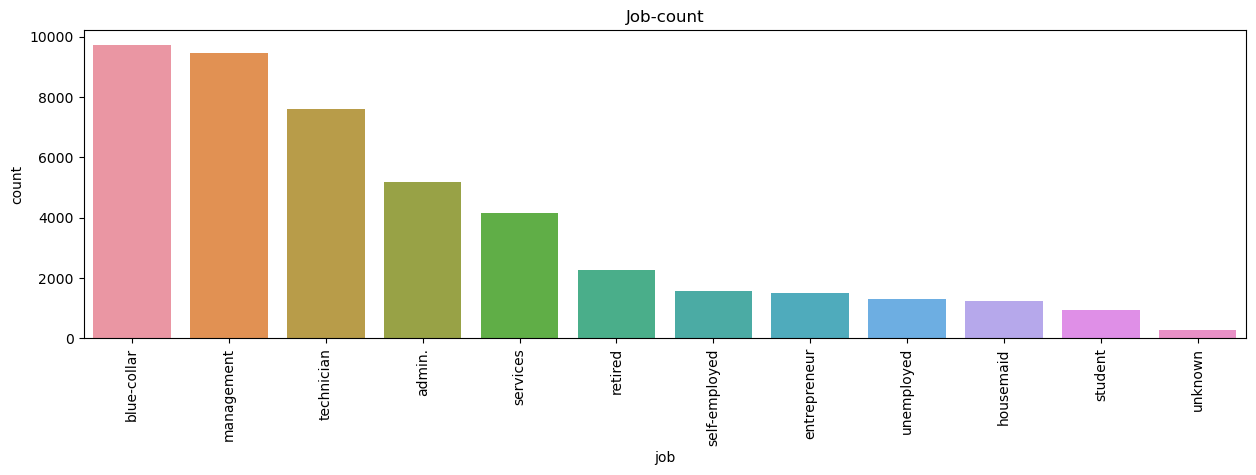

In [10]:
plt.figure(figsize = (15, 4))
sns.countplot(x = 'job', data = data, order = data.job.value_counts().index, orient = 'v')
plt.xticks(rotation = 90)
plt.title('Job-count')
plt.show()

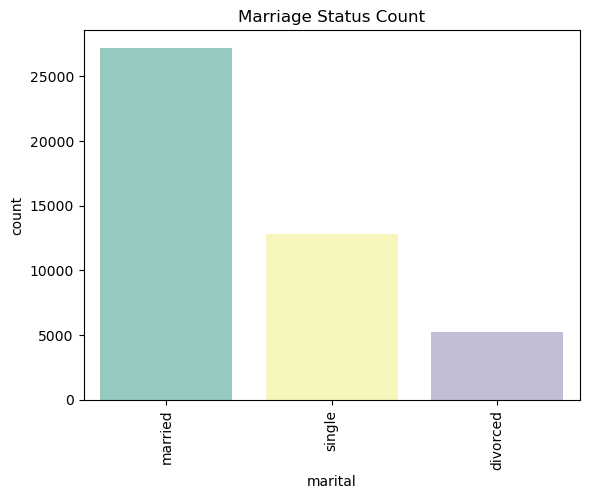

In [11]:
#Plotting similarly for marriage status
category_marital = data['marital'].unique()
custom_mar_palette = sns.color_palette("Set3", n_colors = len(category_marital))

sns.countplot(data = data, x = 'marital', palette = custom_mar_palette, order = data.marital.value_counts().index, orient = 'v')

plt.xticks(rotation = 90)
plt.title('Marriage Status Count')
plt.show()

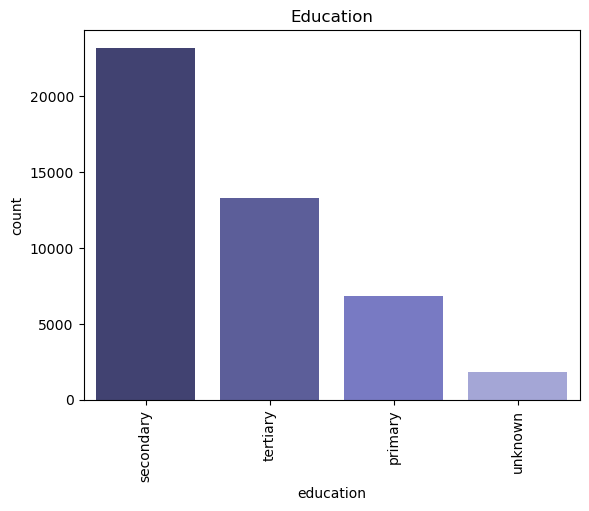

In [12]:
#Similar for education
education_cat = data['education'].unique()
custom_color = sns.color_palette("tab20b", n_colors = len(education_cat))
sns.countplot(data = data, x = 'education', order = data.education.value_counts().index, orient = 'v', palette = custom_color)

plt.xticks(rotation = 90)
plt.title("Education")
plt.show()

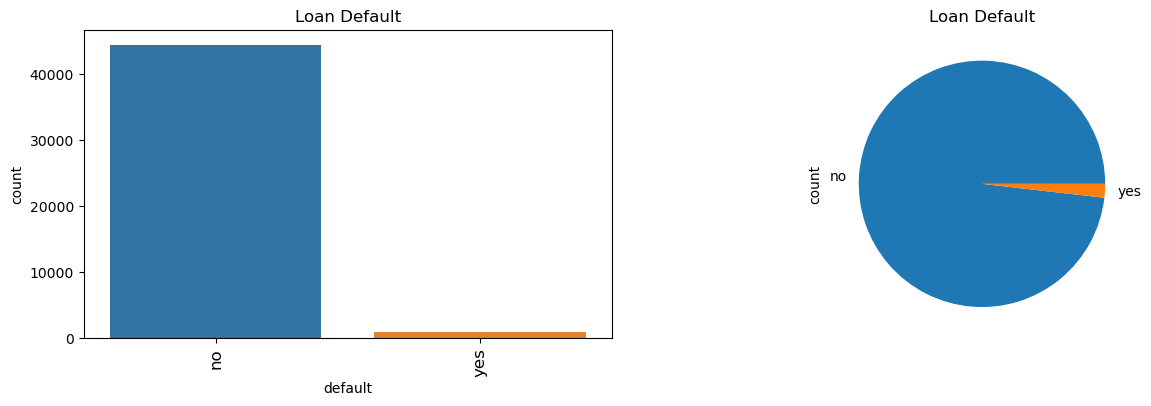

In [13]:
plt.figure(figsize = (15, 4))

plt.subplot(1, 2, 1)
sns.countplot(data = data, x = "default", order = data.default.value_counts().index)
plt.xticks(rotation = 90, fontsize = 12)
plt.title('Loan Default')

plt.subplot(1, 2, 2)
data.default.value_counts().plot(kind = "pie")
plt.title("Loan Default")

plt.show()

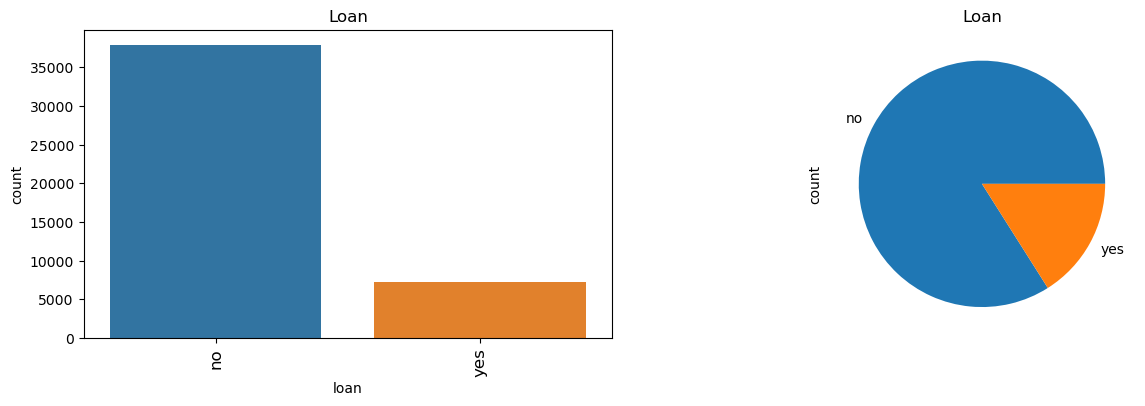

In [14]:
#Similar for Loan
plt.figure(figsize = (15, 4))

plt.subplot(1, 2, 1)
plt.title('Loan')
sns.countplot(data = data, x = 'loan', order = data.loan.value_counts().index) 
plt.xticks(rotation = 90, fontsize = 12)

plt.subplot(1, 2, 2)
data.loan.value_counts().plot(kind = "pie")
plt.title('Loan')

plt.show()

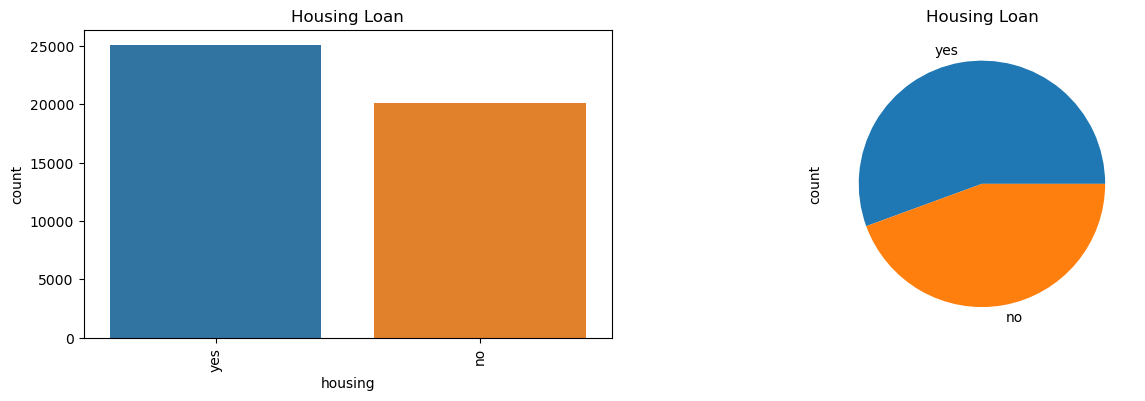

In [15]:
plt.figure(figsize = (15, 4))

plt.subplot(1, 2, 1)
sns.countplot(data = data, order = data.housing.value_counts().index, x = "housing")
plt.title("Housing Loan")
plt.xticks(rotation = 90, )

plt.subplot(1, 2, 2)
data.housing.value_counts().plot(kind = "pie")
plt.title("Housing Loan")

plt.show()

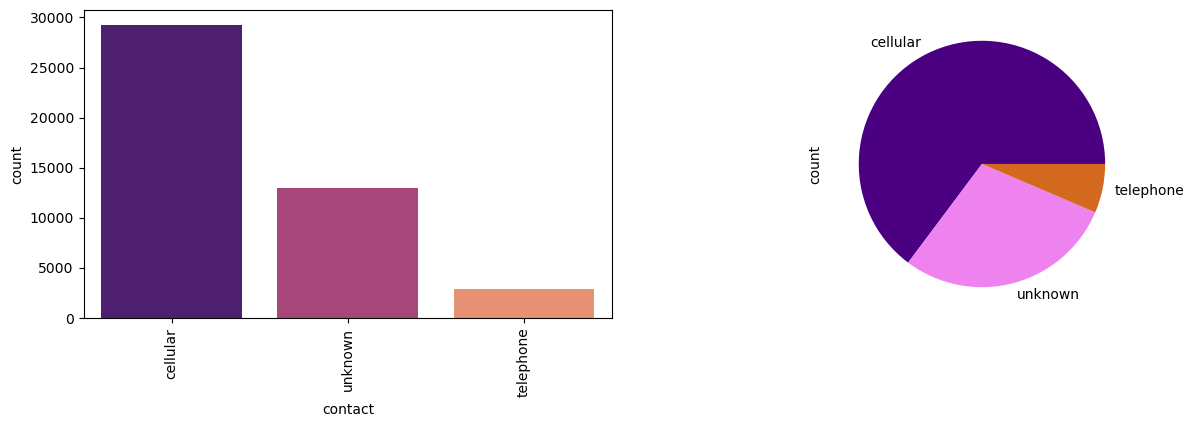

In [16]:
plt.figure(figsize = (15, 4))

plt.subplot(1, 2, 1)
unique = data['contact'].unique()
custom_pallet = sns.color_palette("magma", n_colors = len(unique))
sns.countplot(data = data, order = data.contact.value_counts().index, x = "contact", palette = custom_pallet)
plt.xticks(rotation = 90)

plt.subplot(1, 2, 2)
data.contact.value_counts().plot(kind = "pie", colors = ["indigo", "violet", "chocolate"])
plt.xticks(rotation = 90)

plt.show()

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


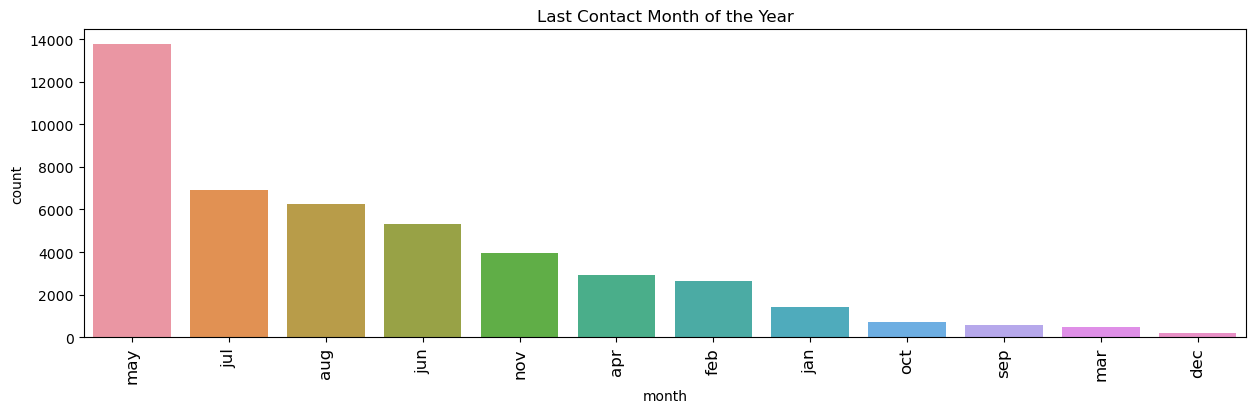

In [18]:
plt.figure(figsize = (15, 4))
sns.countplot(data = data, order = data.month.value_counts().index, x = "month", orient = "v")
plt.xticks(rotation = 90, fontsize = 12)
plt.title("Last Contact Month of the Year")

plt.show()

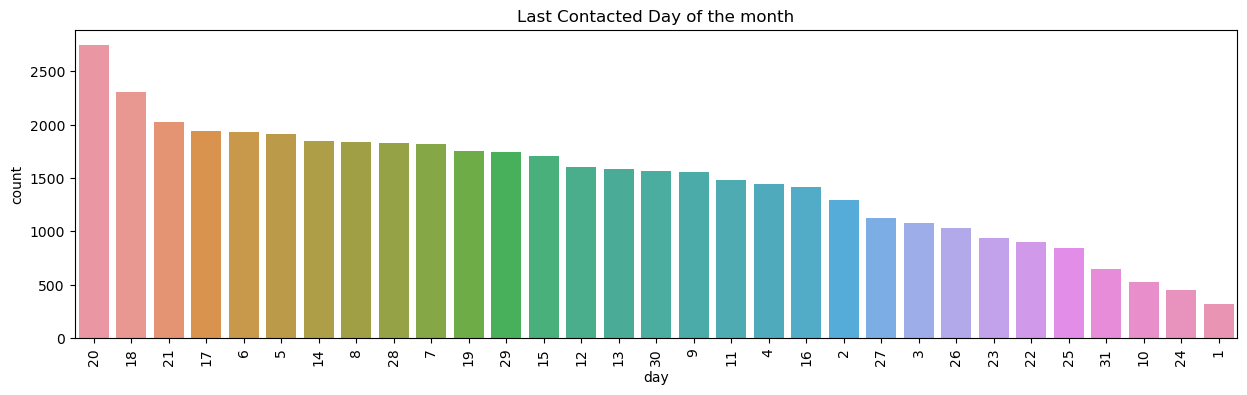

In [19]:
#Similarly
plt.figure(figsize = (15, 4))
 
sns.countplot(data = data, x = 'day', order = data.day.value_counts().index, orient = 'v')
plt.xticks(rotation = 90)
plt.title("Last Contacted Day of the month")
plt.show()

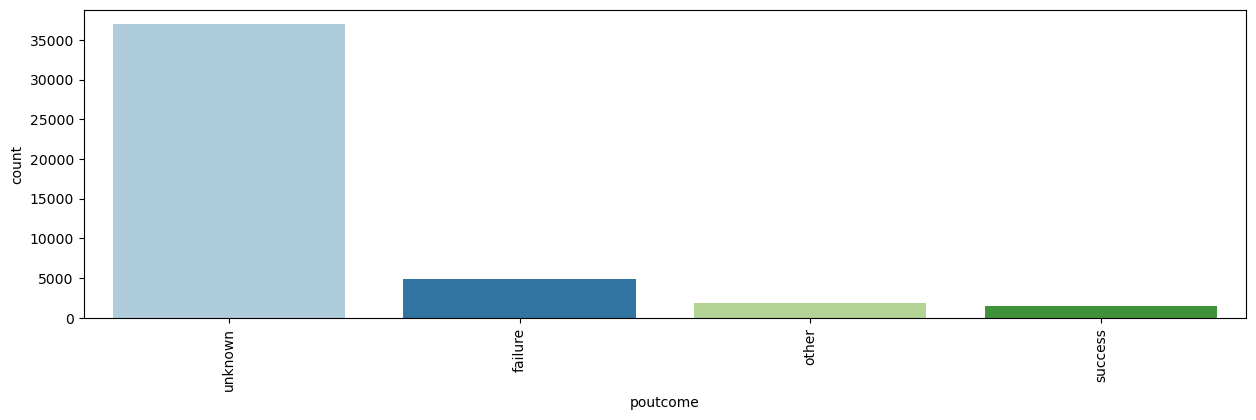

In [20]:
#Outcome of the previous campaign

plt.figure(figsize = (15, 4))
out = data["poutcome"].unique()
colour = sns.color_palette("Paired", n_colors = len(out))
sns.countplot(data = data, x = "poutcome", order = data.poutcome.value_counts().index, orient = "v", palette = colour)
plt.xticks(rotation = 90)
plt.show()

Continuous Variable -> Histogram and Boxplot

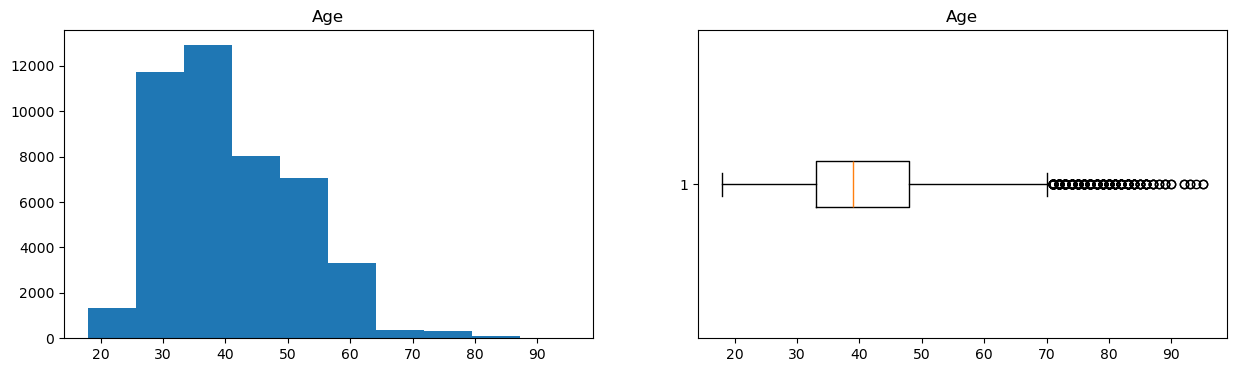

In [21]:
plt.figure(figsize = (15, 4))
plt.subplot(1, 2, 1)
plt.hist(data.age)
plt.title("Age")

plt.subplot(1, 2, 2)
plt.boxplot(data.age, vert = False)
plt.title("Age")

plt.show()

Let's do Similar plot on bank balance

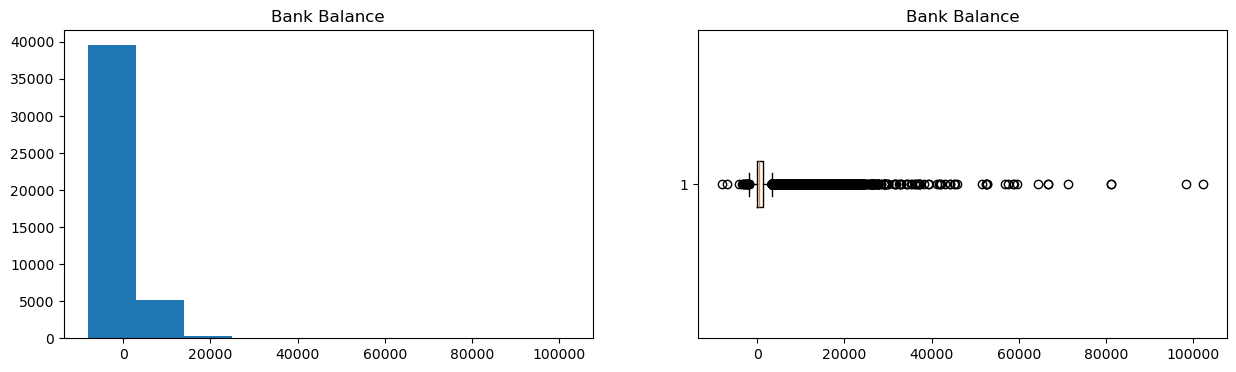

In [22]:
plt.figure(figsize = (15, 4))
plt.subplot(1, 2, 1)
plt.hist(data.balance)
plt.title("Bank Balance")

plt.subplot(1, 2, 2)
plt.boxplot(data.balance, vert = False)
plt.title("Bank Balance")

plt.show()

Let's do similar to Last Contact Duration

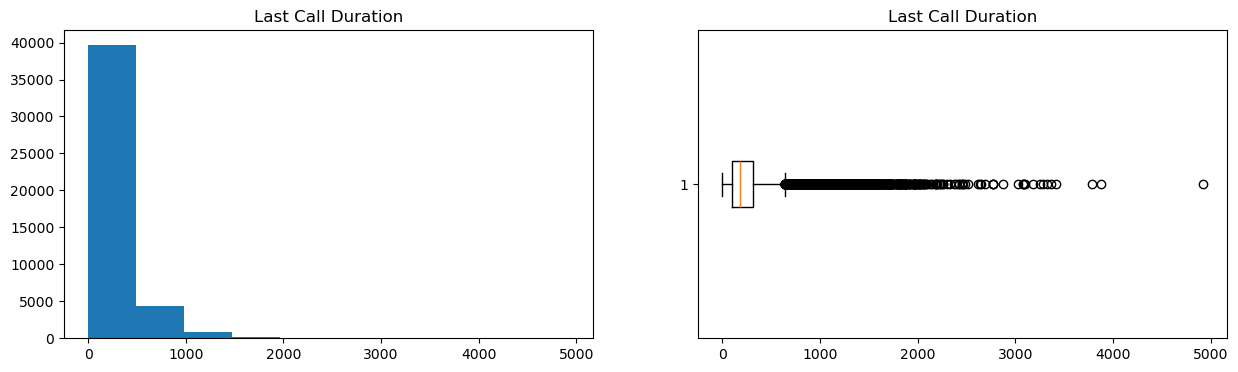

In [23]:
plt.figure(figsize = (15, 4))
plt.subplot(1, 2, 1)
plt.hist(data.duration)
plt.title("Last Call Duration")

plt.subplot(1, 2, 2)
plt.boxplot(data.duration, vert = False)
plt.title("Last Call Duration")

plt.show()

Let's plot to check the difference between number of contacts performed per client during THIS and BEFORE this campaign

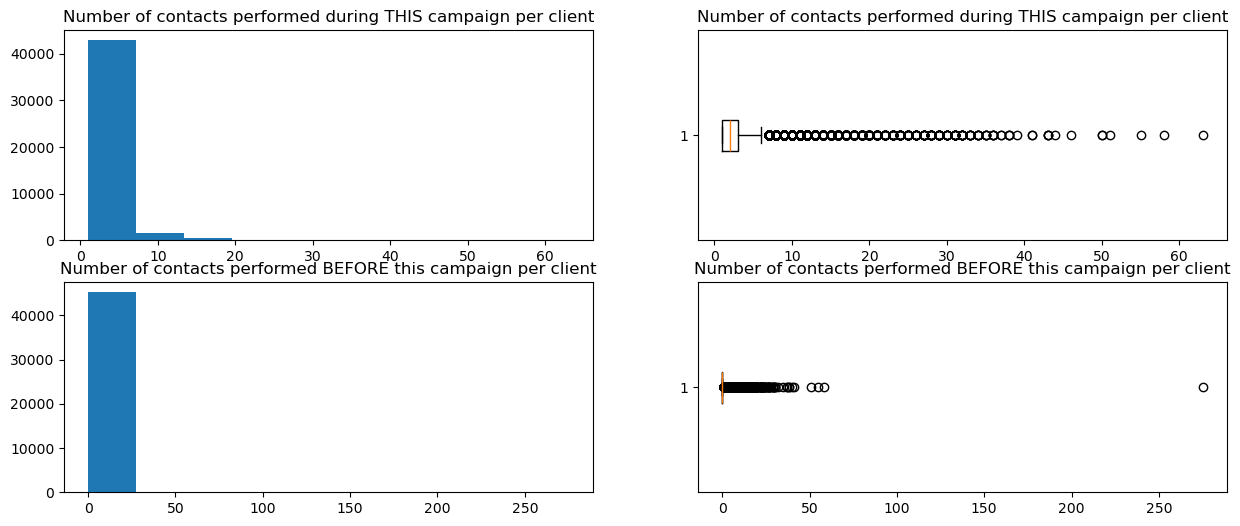

In [24]:
plt.figure(figsize = (15, 6))
plt.subplot(2, 2, 1)
plt.hist(data.campaign)
plt.title("Number of contacts performed during THIS campaign per client")

plt.subplot(2, 2, 2)
plt.boxplot(data.campaign, vert = False)
plt.title("Number of contacts performed during THIS campaign per client")

plt.subplot(2, 2, 3)
plt.hist(data.previous)
plt.title("Number of contacts performed BEFORE this campaign per client")

plt.subplot(2, 2, 4)
plt.boxplot(data.previous, vert = False)
plt.title("Number of contacts performed BEFORE this campaign per client")

plt.show()

Number of days since a client was last contacted

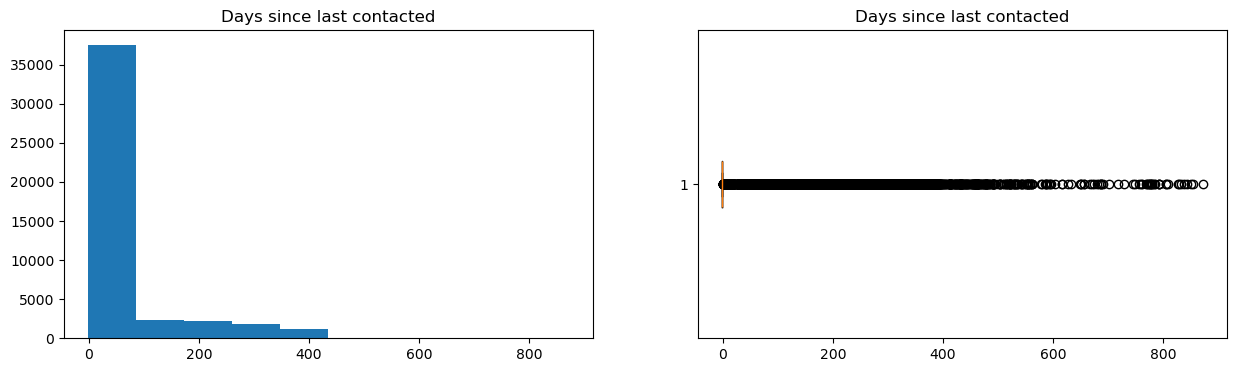

In [25]:
plt.figure(figsize = (15, 4))
plt.subplot(1, 2, 1)
plt.hist(data.pdays)
plt.title("Days since last contacted")

plt.subplot(1, 2, 2)
plt.boxplot(data.pdays, vert = False)
plt.title("Days since last contacted")

plt.show()

Too many outliers, so we can remove them as it will result in huge loss of data

# Univariate Anlysis

#### Creating dataset of all those who subscribed term insurance and count the rows and columns

In [26]:
df = pd.DataFrame(data)
df_yes = df[df['y'] == 'yes']
num_rows, num_cols = df_yes.shape
print("Num of rows", num_rows)
print("Num of columns", num_cols)

Num of rows 5289
Num of columns 17


#### Creating dataset of all those who didn't subscribe for TI and count the rows and columns

In [27]:
df = pd.DataFrame(data)
df_no = df[df['y'] == 'no']
num_rows, num_cols = df_no.shape
print("Num of rows", num_rows)
print("Num of columns", num_cols)

Num of rows 39922
Num of columns 17


In [28]:
data.size == df_yes.size + df_no.size

True

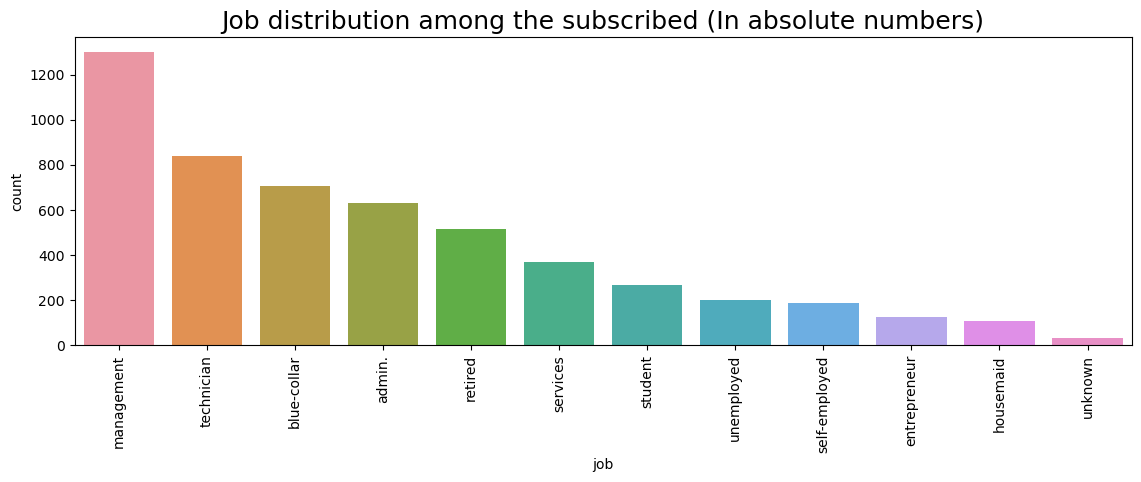

In [29]:
plt.figure(figsize = (30, 4))
plt.subplot(1, 2, 1)
sns.countplot(data = df_yes, x = 'job', order = df_yes.job.value_counts().index)
plt.title("Job distribution among the subscribed (In absolute numbers)", fontsize = 18)
plt.xticks(rotation = 90)

plt.show()

#### Let's calculate the amount of people who subscribed for each of the job below (among the number of people doing that job)



In [30]:
d = pd.crosstab(data.job, data.y)
d_job = pd.DataFrame()
d_job['category'] = ['admin.', 'blue-collar', 'entrepreneur', 'housemaid', 'management', 'retired', 'self-employed', 'services',
                 'student', 'technician', 'unemployed', 'unknown']

In [39]:
pc_job = []

In [40]:
#print(d['yes'])
#print(d['no'])
# From the above code, we can understand that we are creating a contingency table by crosstabulating different
# types of jobs with the number of people subscribed(yes) and not subscribed(no) in the variable 'd'. The function 
# print(d['yes'][0]) prints the information about how many people working for 'admin' job are subscribed to the term deposit 
# as a result of telemarketing campaign. And the function print(d['no'][0]) gives it for people who are not subscribed.
# We can change the index from '0' to any other number upto 12 to get the information about subscription who are working 
# different jobs. For example: print(d['yes'][2]) gives number of subscribers who are entrepreneurs.

#### Now to find the percentage of people who subscribed among each job holders

In [41]:
for idx in range(12):
    pc_job.append(d['yes'][idx] * 100 / (d['yes'][idx] + d['no'][idx]))

In [44]:
pc_job

[12.202668729452718,
 7.274969173859433,
 8.271687962340282,
 8.790322580645162,
 13.755550856417848,
 22.791519434628974,
 11.842938568714375,
 8.883004333172845,
 28.678038379530918,
 11.056996182703699,
 15.502686108979278,
 11.805555555555555]

In [43]:
d_job['pc_job'] = pc_job

In [50]:
d_job
#Admin is at 12%, that is out of 100 admins, only 12 has subscribed etc.

category     pc_job
0          admin.  12.202669
1     blue-collar   7.274969
2    entrepreneur   8.271688
3       housemaid   8.790323
4      management  13.755551
5         retired  22.791519
6   self-employed  11.842939
7        services   8.883004
8         student  28.678038
9      technician  11.056996
10     unemployed  15.502686
11        unknown  11.805556

### Let's plot the graph for the percentage of values for individual jobs

[]

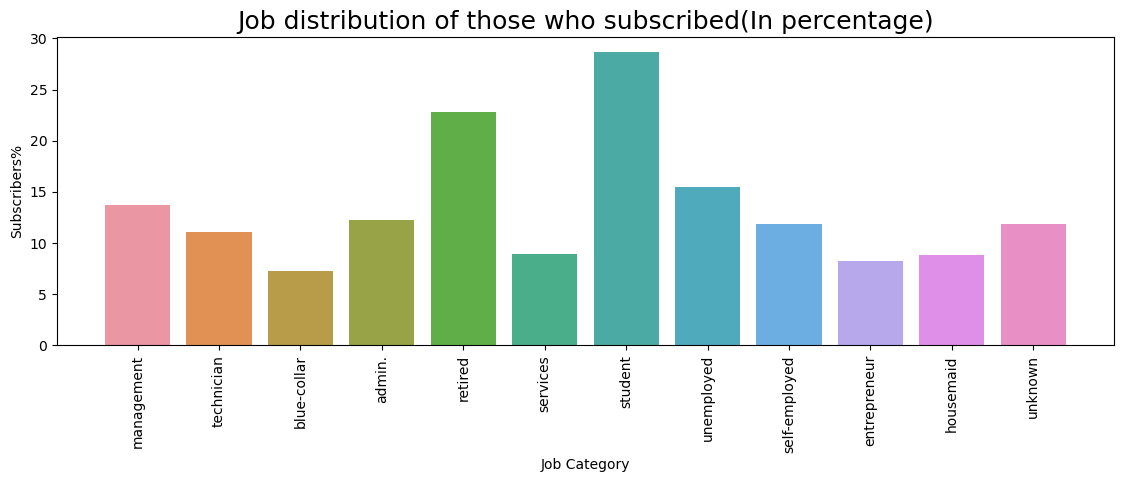

In [51]:
plt.figure(figsize = (30, 4))
plt.subplot(1, 2, 1)
sns.barplot(data = d_job, x = 'category', y = 'pc_job', order = df_yes.job.value_counts().index)
plt.xlabel("Job Category")
plt.xticks(rotation = 90)
plt.ylabel("Subscribers%")
plt.title('Job distribution of those who subscribed(In percentage)', fontsize = 18 ) 
plt.plot()

#### Let's check similarly based on marriage status(In absolut numbers)

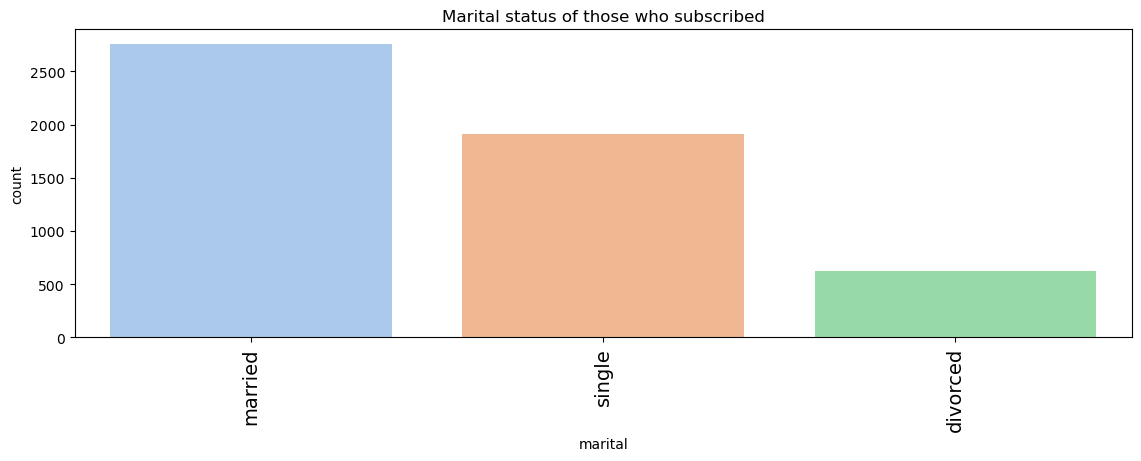

In [54]:
plt.figure(figsize = (30, 4))
plt.subplot(1, 2, 1)
unique_marital = data['marital'].unique()
custom_pallette = sns.color_palette("pastel", n_colors = len(unique_marital))

sns.countplot(data = df_yes, x = 'marital', order = df_yes.marital.value_counts().index, palette = custom_pallette)
plt.xticks(rotation = 90, fontsize = 14)
plt.title("Marital status of those who subscribed")

plt.show()

#### Similar to above, let's check the percentage of people based on marital status who subscribed in their category

[]

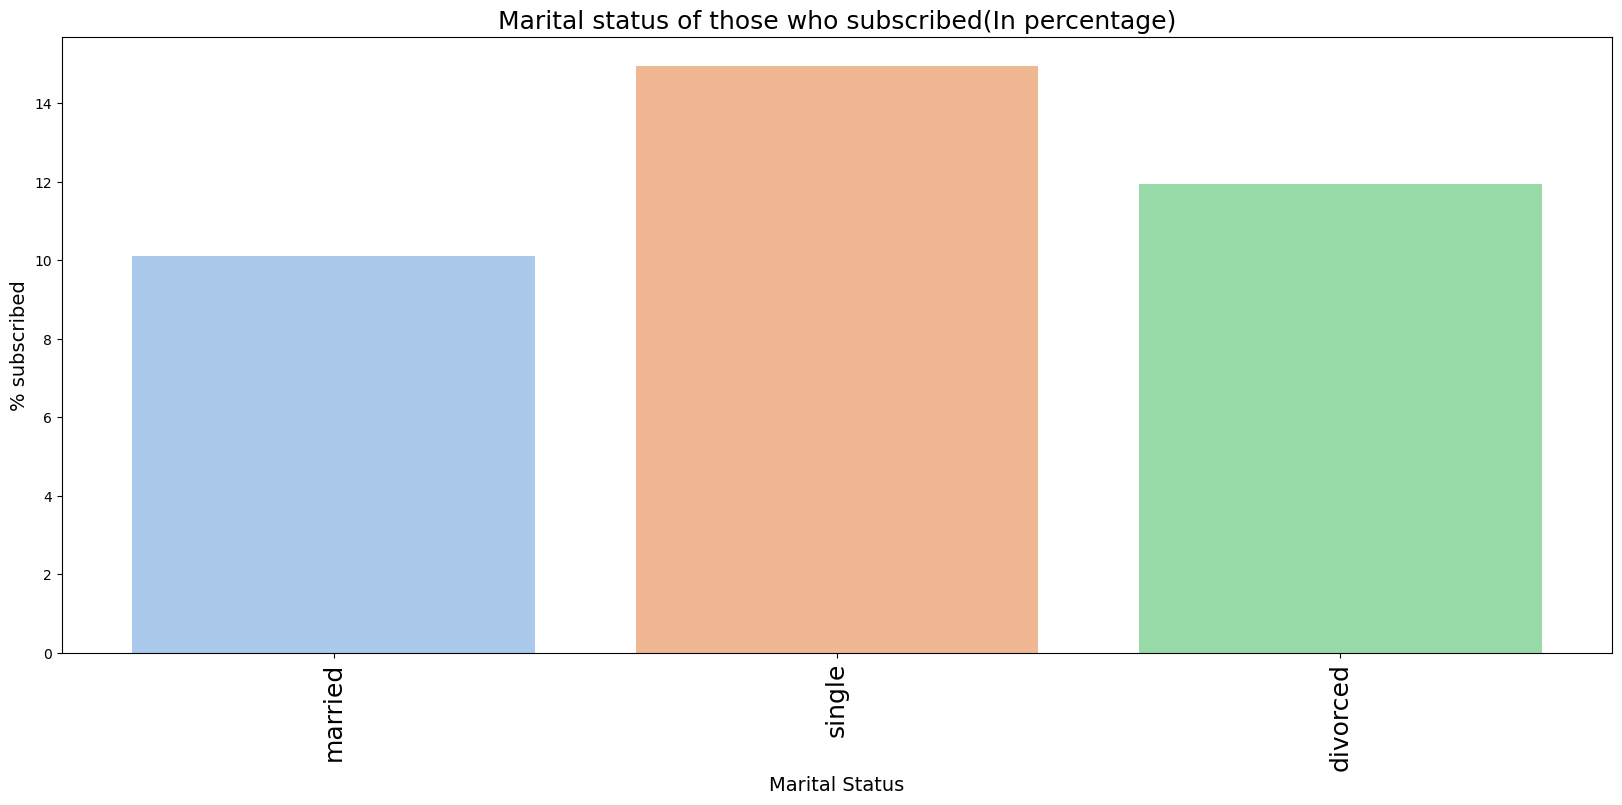

In [148]:
d = pd.crosstab(data.marital, data.y)
d_marital = pd.DataFrame()
d_marital['marital'] = ['divorced', 'married', 'single',]

pc_marital = []

for idx in range(3):
    pc_marital.append(d['yes'][idx] * 100 / (d['yes'][idx] + d['no'][idx]))

d_marital['pc_marital'] = pc_marital

plt.figure(figsize = (20, 8))
unique_mar_categories = data['marital'].unique()
custom_mar_palette = sns.color_palette("pastel", n_colors = len(unique_mar_categories))
sns.barplot(data = d_marital, x = 'marital', y = pc_marital, order = df_yes.marital.value_counts().index, palette = custom_mar_palette)
plt.title('Marital status of those who subscribed(In percentage)', fontsize = 18)
plt.xlabel('Marital Status', fontsize = 14)
plt.ylabel('% subscribed', fontsize = 14)
plt.xticks(rotation = 90, fontsize = 18)

plt.plot()

### Let's do the same task for education(Both absolute number and in percentage) 

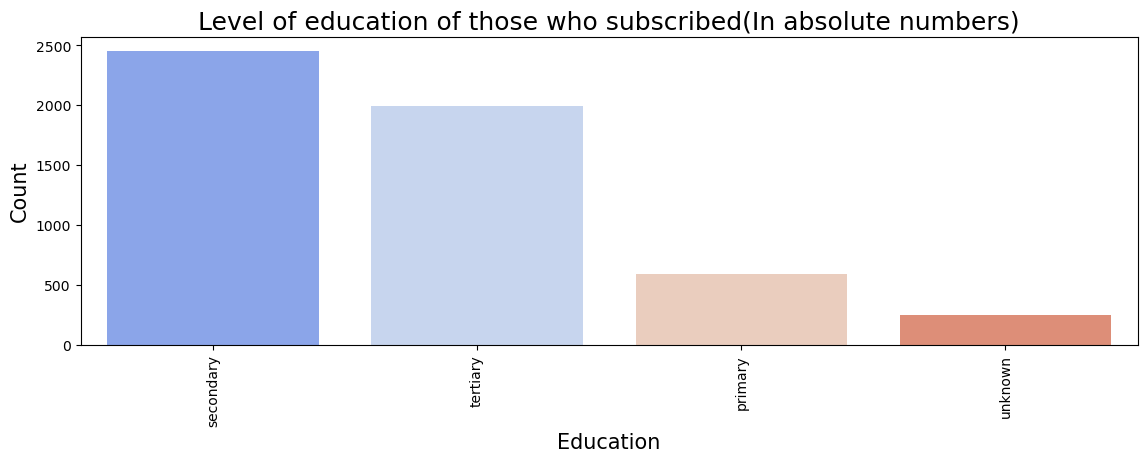

In [89]:
plt.figure(figsize = (30, 4))
plt.subplot(1, 2, 1)
unique_edu = data['education'].unique()
unique_edu_pallette = sns.color_palette("coolwarm", n_colors = len(unique_edu))
sns.countplot(data = df_yes, x = "education", order = df_yes.education.value_counts().index, palette = unique_edu_pallette)
plt.title("Level of education of those who subscribed(In absolute numbers)", fontsize = 18)
plt.xlabel("Education", fontsize = 15)
plt.ylabel("Count", fontsize = 15)
plt.xticks(rotation = 90)

plt.show()

In [149]:
d = pd.crosstab(data.education, data.y)
df_edu = pd.DataFrame()
df_edu['education'] = ['primary', 'secondary', 'tertiary', 'unknown']

pc_edu = []

In [150]:
for i in range(4):
    pc_edu.append(d['yes'][i] * 100 / (d['no'][i] + d['yes'][i]))

In [151]:
df_edu['pc_edu'] = pc_edu

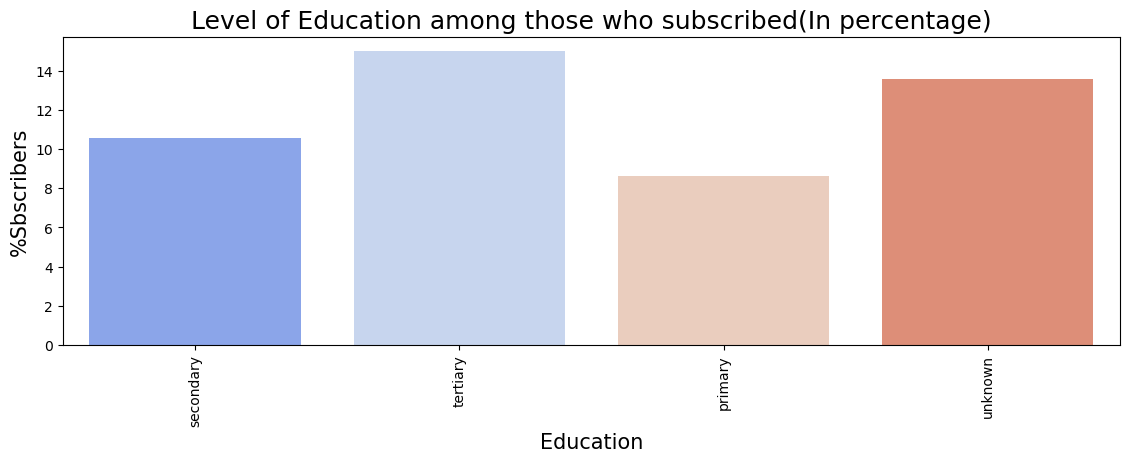

In [152]:
plt.figure(figsize = (30, 4))
plt.subplot(1, 2, 2)
unique_edu_cat = data['education'].unique()
unique_edu_colors = sns.color_palette("coolwarm", n_colors = len(unique_edu_cat))
sns.barplot(data = df_edu, x = 'education', y = pc_edu, order = df_yes['education'].value_counts().index, palette = unique_edu_colors)
plt.title("Level of Education among those who subscribed(In percentage)", fontsize = 18)
plt.xlabel("Education", fontsize = 15)
plt.ylabel("%Sbscribers", fontsize = 15)
plt.xticks(rotation = 90)
plt.show()

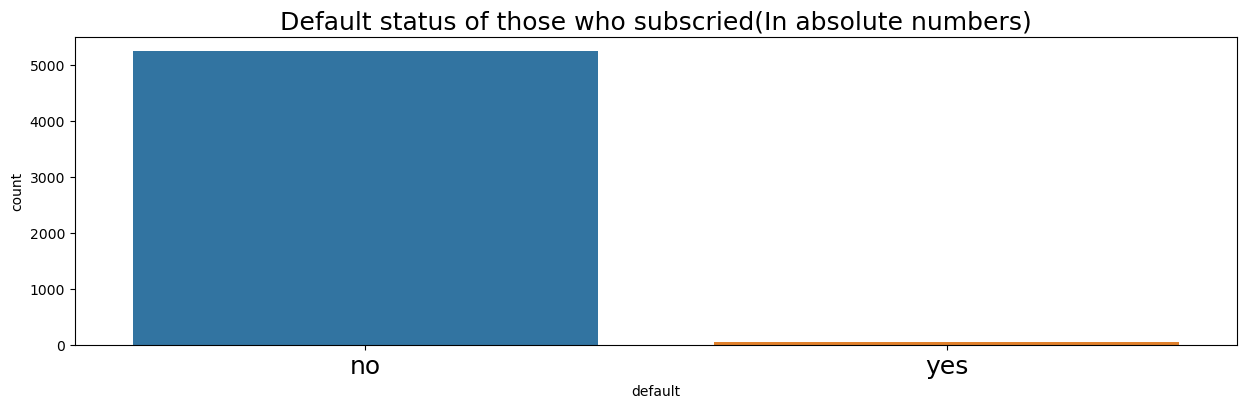

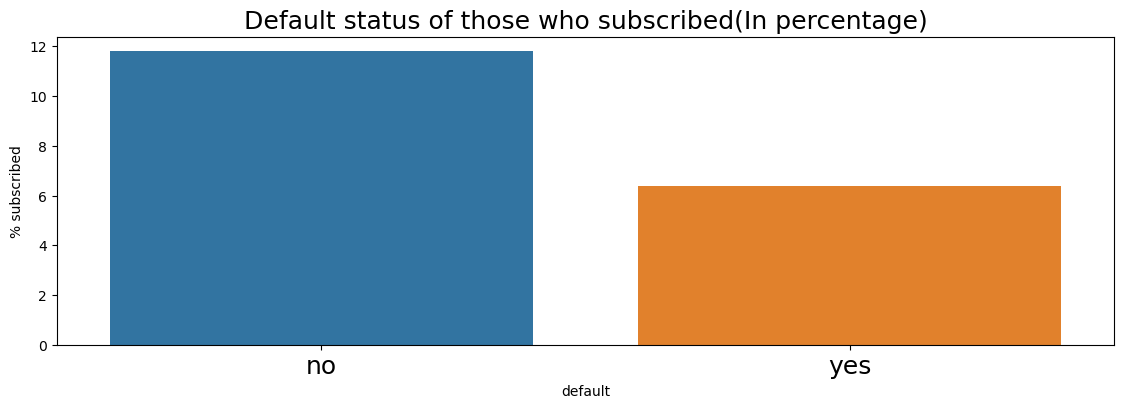

In [112]:
plt.figure(figsize = (15,4))
sns.countplot(x = 'default',  order= df_yes.default.value_counts().index , data = df_yes)
plt.xticks(fontsize = 18)
plt.title('Default status of those who subscried(In absolute numbers)', fontsize = 18)
plt.show()

d = pd.crosstab(data.default, data.y)

d_default = pd.DataFrame()
d_default['default'] = ['no', 'yes'] 

pc_default = []

for i in range(len(d_default.default)):
    pc_default.append(d['yes'][i] * 100 / (d['no'][i] + d['yes'][i])) 

d_default['pc_default'] = pc_default

plt.figure(figsize = (30,4))
plt.subplot(1, 2, 2)
sns.barplot(x = 'default', y = pc_default, order = df_yes.default.value_counts().index, data = d_default)
plt.title('Default status of those who subscribed(In percentage)', fontsize = 18)
plt.ylabel('% subscribed')
plt.xticks(fontsize = 18)
plt.show()

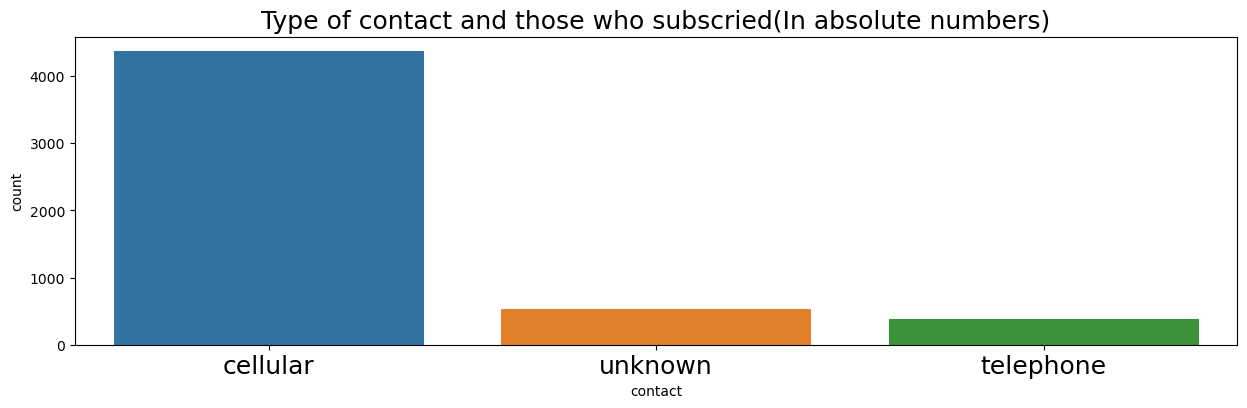

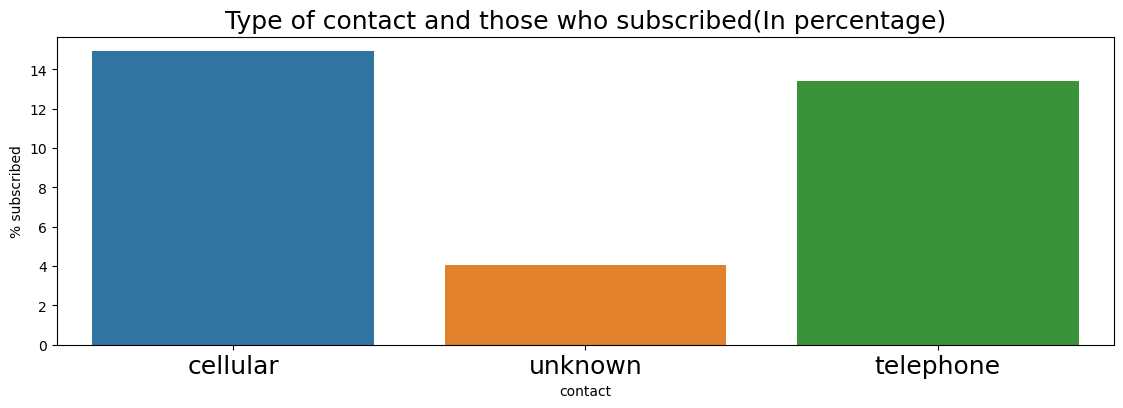

In [113]:
plt.figure(figsize = (15, 4))
sns.countplot(x = 'contact',  order = df_yes.contact.value_counts().index, data = df_yes)
plt.xticks(fontsize = 18)
plt.title('Type of contact and those who subscried(In absolute numbers)', fontsize = 18)
plt.show() 

d = pd.crosstab(data.contact, data.y)

d_contact = pd.DataFrame()
d_contact['contact'] = ['cellular', 'telephone', 'unknown'] 

pc_contact = []

for i in range(len(d_contact.contact)):
    pc_contact.append(d['yes'][i] * 100 / (d['no'][i] + d['yes'][i])) 

d_contact['pc_contact'] = pc_contact

plt.figure(figsize = (30, 4))
plt.subplot(1, 2, 2)
sns.barplot(x = 'contact', y = pc_contact, order = df_yes.contact.value_counts().index, data = d_contact)
plt.title('Type of contact and those who subscribed(In percentage)', fontsize = 18) 
plt.ylabel('% subscribed')
plt.xticks(fontsize = 18)
plt.show()
# cellular is 14% means out of 100 customers contacted on cellular device, 14 subscribed

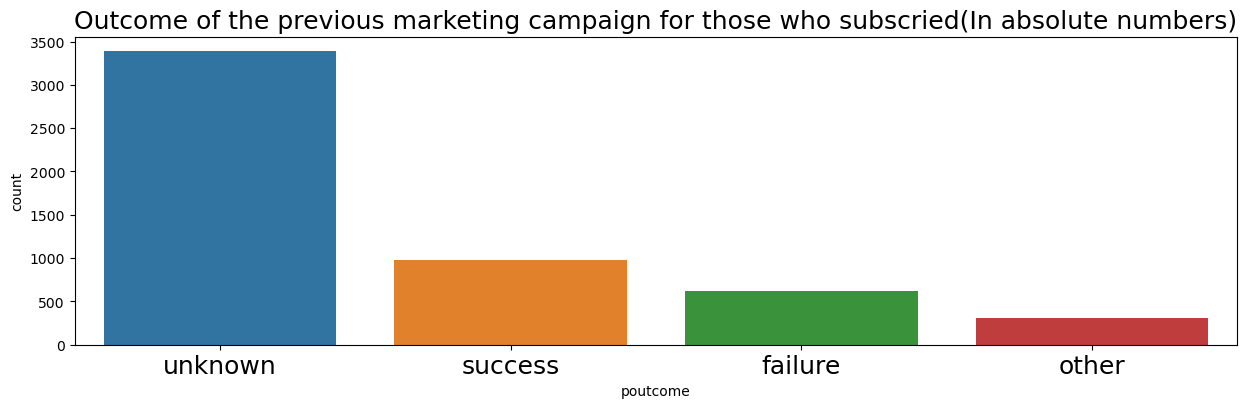

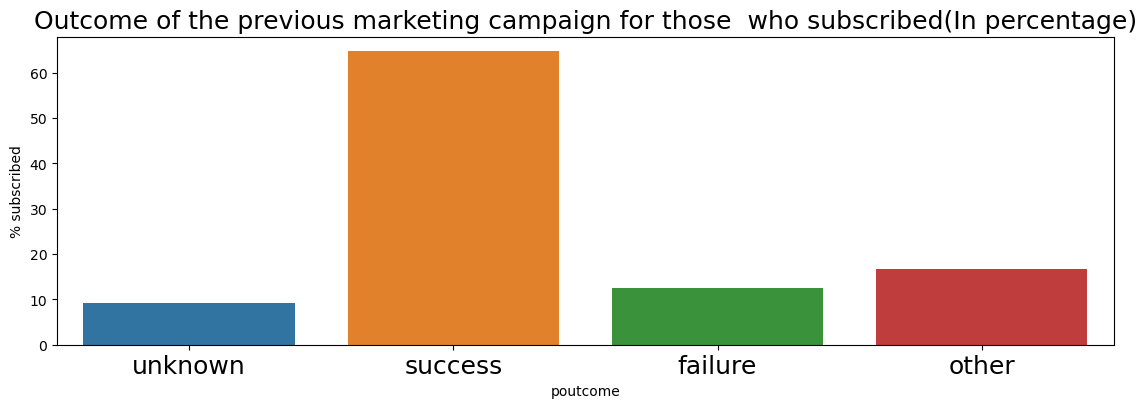

In [114]:
plt.figure(figsize = (15, 4))
sns.countplot(x = 'poutcome', order = df_yes.poutcome.value_counts().index, data = df_yes)
plt.xticks(fontsize = 18)
plt.title('Outcome of the previous marketing campaign for those who subscried(In absolute numbers)', fontsize = 18)
plt.show()

d = pd.crosstab(data.poutcome, data.y)

d_poutcome = pd.DataFrame()
d_poutcome['poutcome'] = ['failure', 'other', 'success', 'unknown'] 

pc_poutcome = []

for i in range(len(d_poutcome.poutcome)):
    pc_poutcome.append(d['yes'][i] * 100 / (d['no'][i] + d['yes'][i])) 

d_poutcome['pc_poutcome'] = pc_poutcome

plt.figure(figsize = (30, 4))
plt.subplot(1, 2, 2)
sns.barplot(x = 'poutcome', y = pc_poutcome, order = df_yes.poutcome.value_counts().index, data = d_poutcome)
plt.title('Outcome of the previous marketing campaign for those  who subscribed(In percentage)', fontsize = 18 ) 
plt.ylabel('% subscribed')
plt.xticks(fontsize = 18)
plt.show()

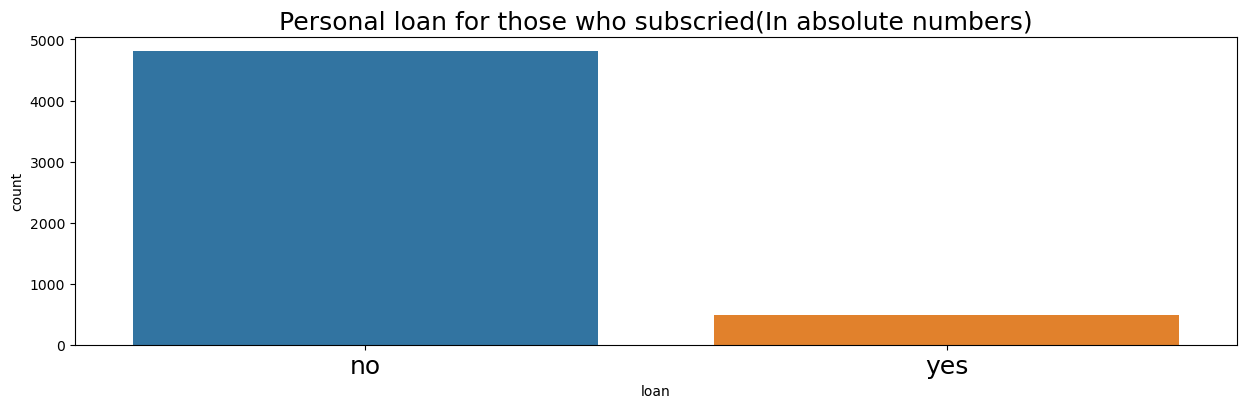

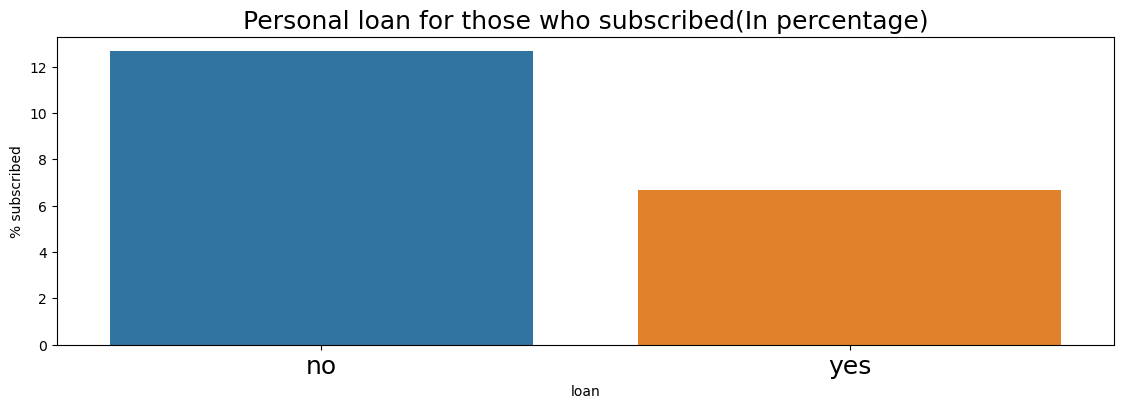

In [116]:
plt.figure(figsize = (15, 4))
sns.countplot(x = 'loan', order = df_yes.loan.value_counts().index, data = df_yes)
plt.xticks(fontsize = 18)
plt.title('Personal loan for those who subscried(In absolute numbers)', fontsize = 18)
plt.show()

d = pd.crosstab(data.loan , data.y)

d_loan = pd.DataFrame()
d_loan['loan'] = ['no', 'yes'] 

pc_loan = []

for i in range (len(d_loan.loan)):
    pc_loan.append(d['yes'][i] * 100 / (d['no'][i] + d['yes'][i])) 

d_loan['pc_loan'] = pc_loan

plt.figure(figsize = (30, 4))
plt.subplot(1, 2, 2)
sns.barplot(x = 'loan', y = pc_loan, order = df_yes.loan.value_counts().index, data = d_loan)
plt.title('Personal loan for those who subscribed(In percentage)', fontsize = 18) 
plt.ylabel('% subscribed')
plt.xticks(fontsize = 18)
plt.show()
#Out of 100 customers not having personal loans, 12 subscribed

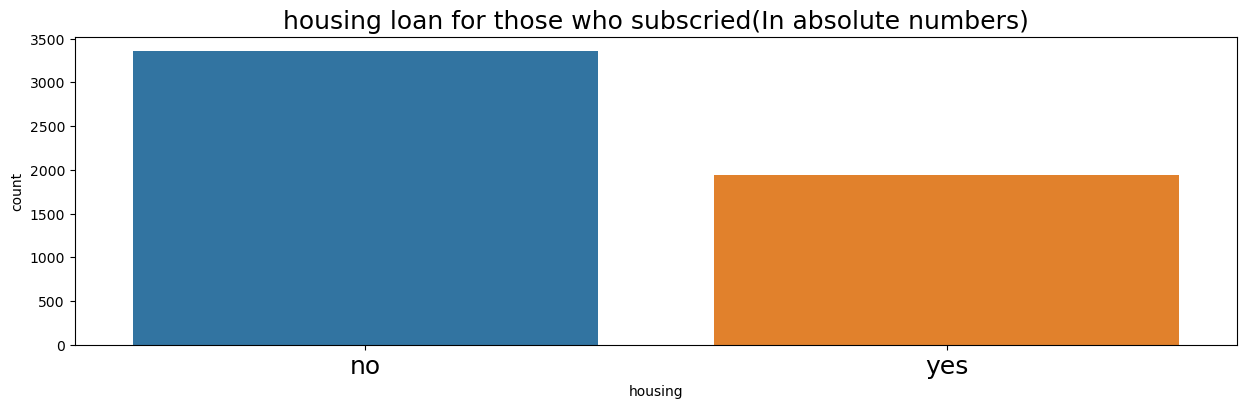

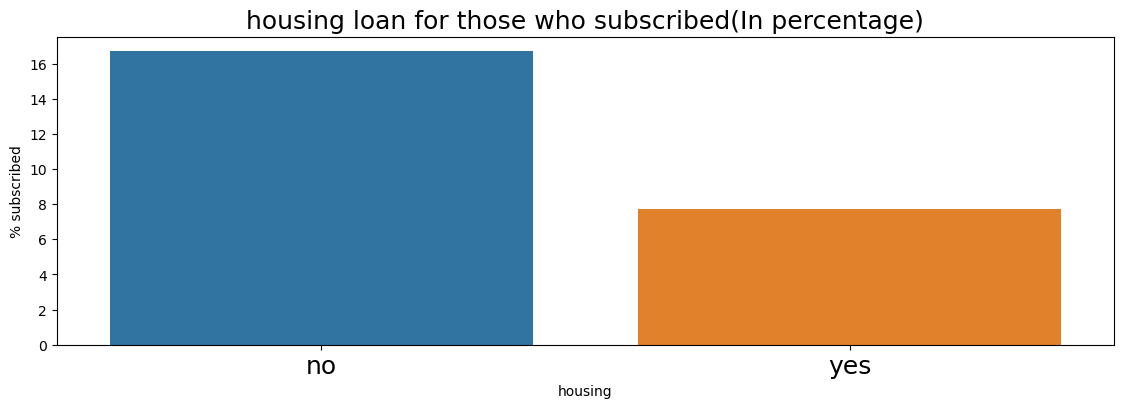

In [117]:
plt.figure(figsize = (15, 4))
sns.countplot(x = 'housing', order = df_yes.housing.value_counts().index, data = df_yes)
plt.xticks(fontsize = 18)
plt.title('housing loan for those who subscried(In absolute numbers)', fontsize = 18)
plt.show()

d = pd.crosstab(data.housing, data.y)

d_housing = pd.DataFrame()
d_housing['housing'] = ['no', 'yes'] 

pc_housing = []

for i in range(len(d_housing.housing)):
    pc_housing.append(d['yes'][i] * 100 / (d['no'][i] + d['yes'][i])) 

d_housing['pc_housing'] = pc_housing

plt.figure(figsize = (30, 4))
plt.subplot(1, 2, 2)
sns.barplot(x = 'housing', y = pc_housing, order = df_yes.housing.value_counts().index, data = d_housing)
plt.title('housing loan for those who subscribed(In percentage)', fontsize = 18) 
plt.ylabel('% subscribed')
plt.xticks(fontsize = 18)
plt.show()
#Out of 100 customers not having housing loans, 16 subscribed

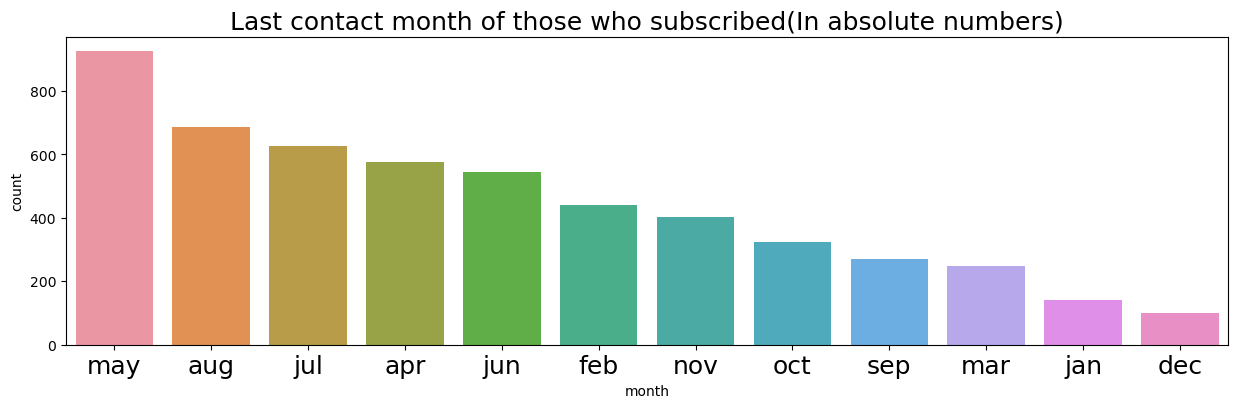

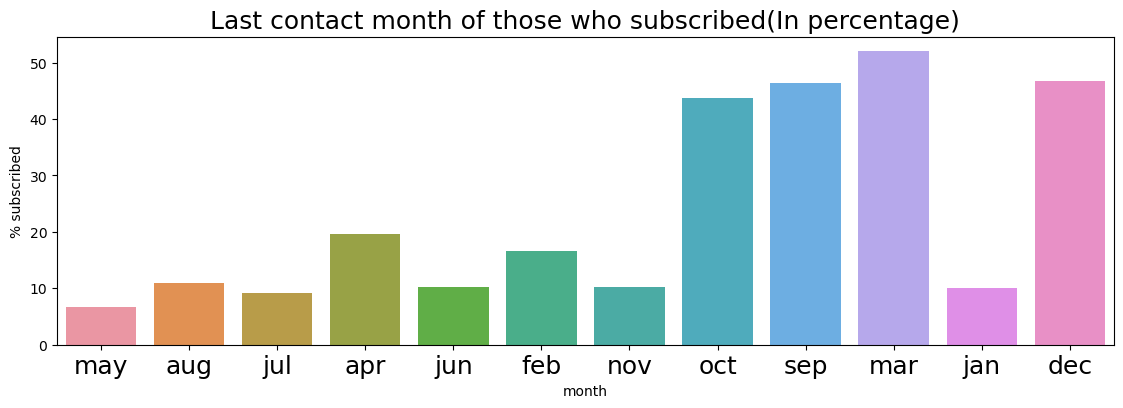

In [118]:
plt.figure(figsize = (15, 4))
sns.countplot(x = 'month', order = df_yes.month.value_counts().index, data = df_yes)
plt.xticks(fontsize = 18)
plt.title('Last contact month of those who subscribed(In absolute numbers)', fontsize = 18)
plt.show()

d = pd.crosstab(data.month, data.y)

d_month = pd.DataFrame()
d_month['month'] = ['apr', 'aug', 'dec', 'feb', 'jan', 'jul', 'jun', 'mar', 'may', 'nov', 'oct', 'sep'] 

pc_month = []

for i in range(len(d_month.month)):
    pc_month.append(d['yes'][i] * 100 / (d['no'][i] + d['yes'][i])) 

d_month['pc_month'] = pc_month

plt.figure(figsize = (30, 4))
plt.subplot(1, 2, 2)
sns.barplot(x = 'month', y = pc_month, order = df_yes.month.value_counts().index, data = d_month)
plt.title('Last contact month of those who subscribed(In percentage)', fontsize = 18) 
plt.ylabel('% subscribed')
plt.xticks(fontsize = 18)
plt.show()
#Out of 100 customers last contacted in march, 50 subscribed

### Continuous Vaiable

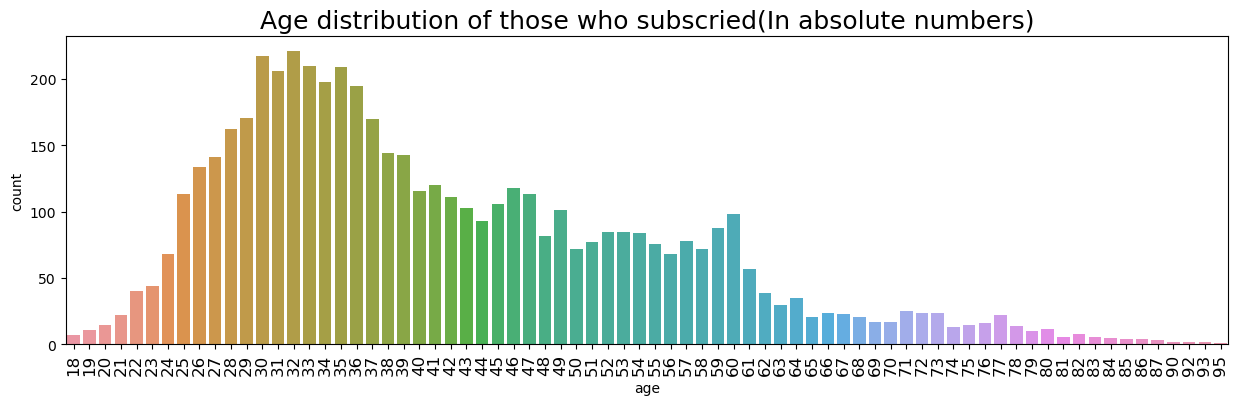

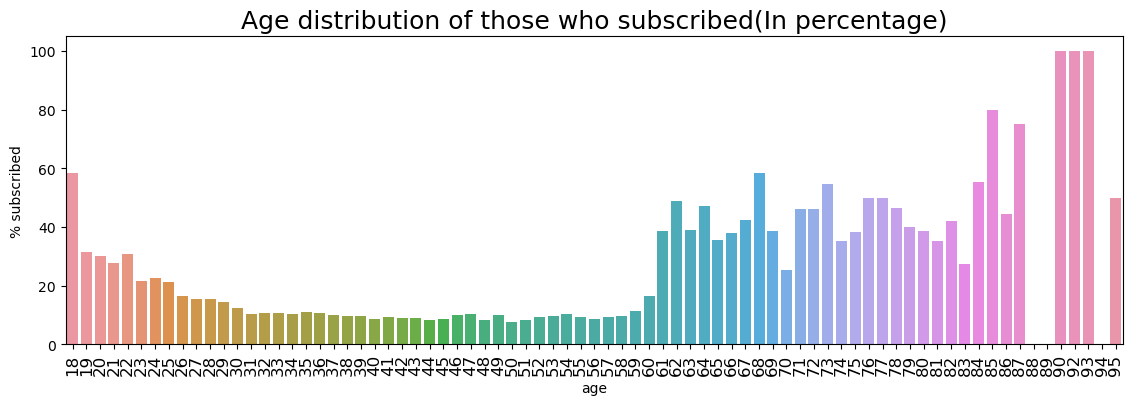

In [129]:
plt.figure(figsize = (15, 4))
sns.countplot(x = 'age', data = df_yes)
plt.xticks(rotation = 90, fontsize = 12)
plt.title('Age distribution of those who subscried(In absolute numbers)', fontsize = 18)
plt.show()

d = pd.crosstab( data.age , data.y )

age_list = np.arange(18, 96).tolist()
age_list.remove(91)# age 91 not present in data

d_age = pd.DataFrame()
d_age['age'] = age_list 

pc_age = []

for i in d_age.age:
    pc_age.append(d['yes'][i] * 100 / (d['no'][i] + d['yes'][i])) 
    
d_age['pc_age'] = pc_age

plt.figure(figsize = (30, 4))
plt.subplot(1, 2, 2)
sns.barplot(x = 'age', y = pc_age, data = d_age)
plt.title('Age distribution of those who subscribed(In percentage)', fontsize = 18)
plt.ylabel('% subscribed')
plt.xticks(rotation = 90, fontsize = 12)
plt.show()

In [131]:
#Let's create a list and for each individual, append a string to it "No balance"; "Low Balance" ; "Average balance" ; "High Balance", 
# according to balance level 0 ; 0~1000 ; 1000~5000 ; 5000~ respectively

balance = []

for i in range(len(data)):
    if data.balance[i] <= 0:
        balance.append("No balance")
    elif (data.balance[i] > 0) & (data.balance[i] <= 1000):
        balance.append("Low balance")
    elif (data.balance[i] > 1000) & (data.balance[i] <= 5000):
        balance.append("Average balance")
    elif (data.balance[i] > 5000):
        balance.append("High balance")

In [133]:
data['Balance'] = balance

In [136]:
df_yes = data.loc[data['y'] == 'yes'] 
df_yes.shape

(5289, 18)

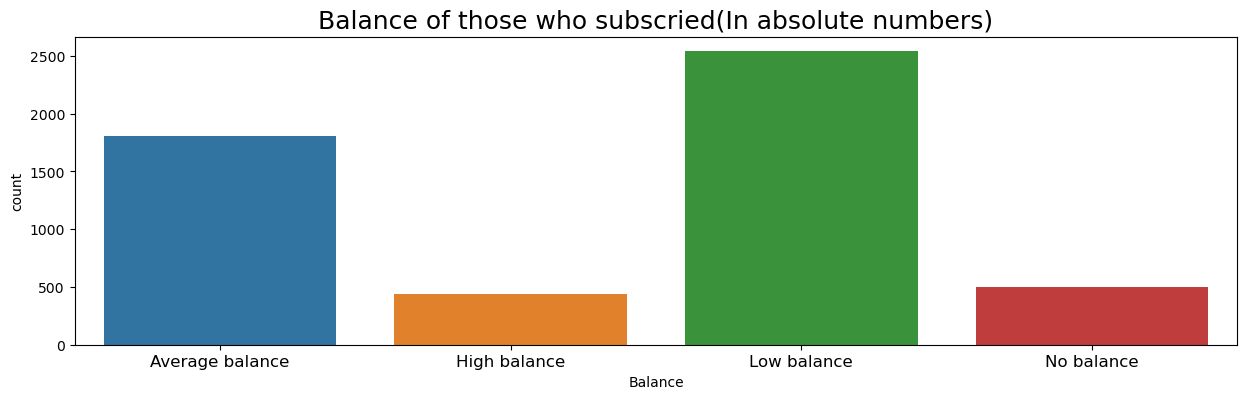

In [137]:
plt.figure(figsize = (15, 4))
sns.countplot(x = 'Balance', order = ['Average balance', 'High balance', 'Low balance', 'No balance'], data = df_yes)
plt.xticks(fontsize = 12)
plt.title('Balance of those who subscried(In absolute numbers)', fontsize = 18)
plt.show()

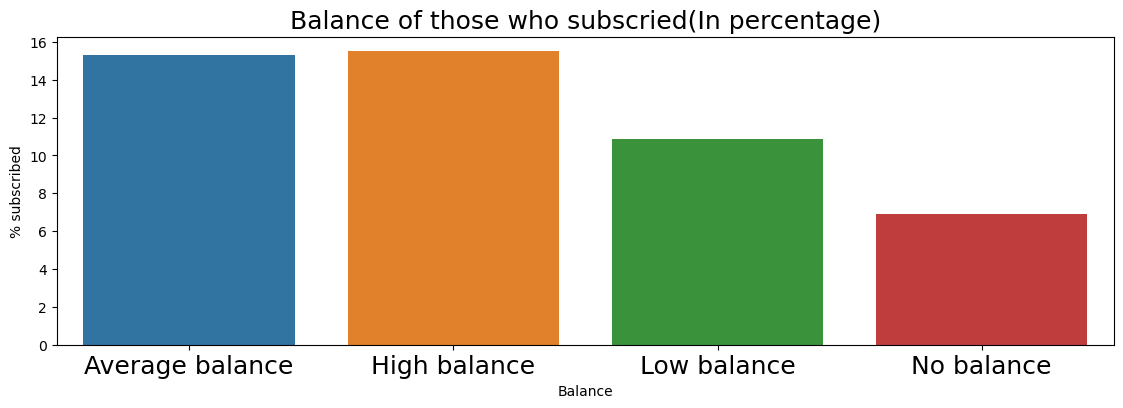

In [138]:
d = pd.crosstab(data.Balance, data.y)

d_Balance = pd.DataFrame()
d_Balance['Balance'] = ['Average balance', 'High balance', 'Low balance', 'No balance']

pc_Balance = []

for i in range (len(d_Balance.Balance)):
    pc_Balance.append(d['yes'][i] * 100 / (d['no'][i] + d['yes'][i])) 

d_Balance['pc_Balance'] = pc_Balance

plt.figure(figsize = (30, 4))
plt.subplot(1, 2, 2)
sns.barplot(x = 'Balance', y = pc_Balance, data = d_Balance)
plt.title('Balance of those who subscried(In percentage)', fontsize = 18) 
plt.ylabel('% subscribed')
plt.xticks(fontsize = 18)
plt.show()
#Out of 100 customers with average balance, 15 subscribed

# Bivariate Analysis

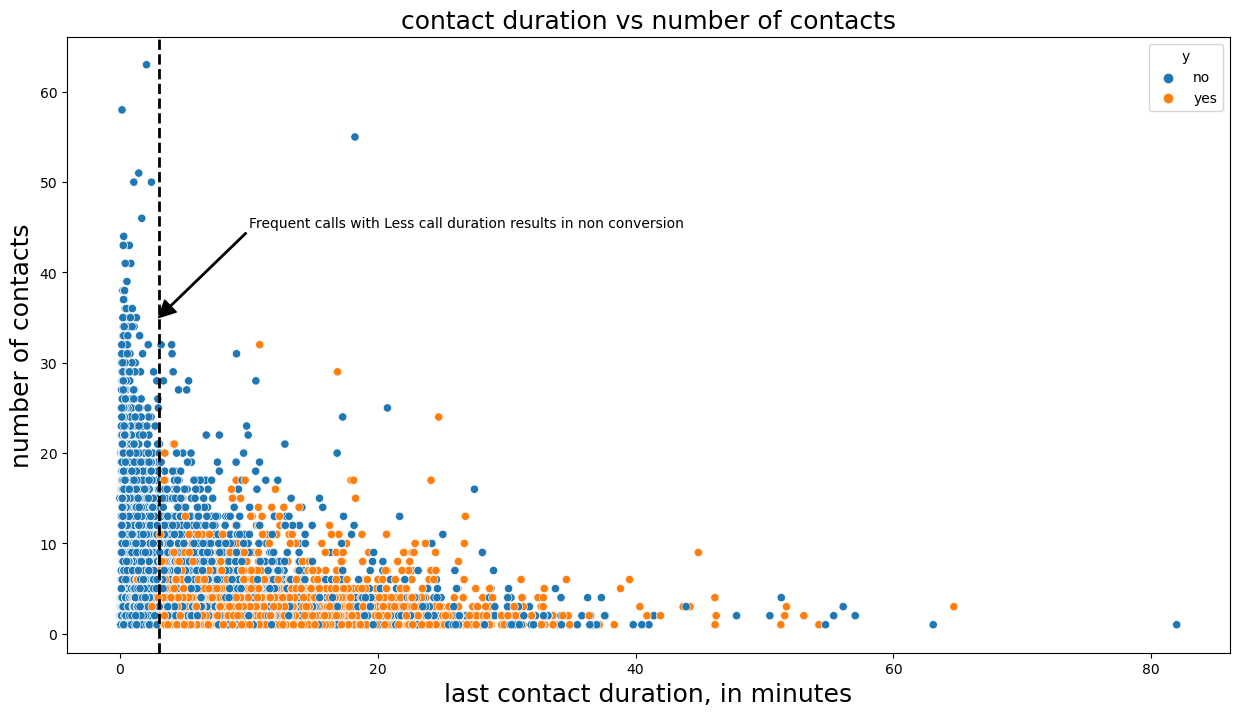

In [147]:
plt.figure(figsize = (15, 8))

sns.scatterplot(x = (data.duration) / 60, y = data.campaign, hue = data.y)

plt.title('contact duration vs number of contacts', fontsize = 18) 
plt.xlabel('last contact duration, in minutes', fontsize = 18)
plt.ylabel('number of contacts', fontsize = 18)
#After some observations,
plt.axvline(x = 3, linewidth = 2, color = "k", linestyle = '--' )
plt.annotate("Frequent calls with Less call duration results in non conversion", xytext = (10, 45),
             arrowprops = dict(color = 'k', width = 1), xy = (3, 35))
plt.show()

### Insights

1. Students and retired personnel are more likely to subscribe term deposit.

2. Married customers are less likely to subscribe as compared to singles.

3. Tertiary educated customers are more likely to subscribe, though in absolute numbers more subscribers are secondary educated. 

4. Those customers who have no credit default are more likely to subscribe.

5. conversion ration(call to subscription) is good in march, sept, oct, dec. More calls can fetch more subscriptions.
Months of april, may, june, july, aug have more subscriptions in terms of absolute numbers but at the cost of thousands of calls made. So cost to benefit ratio is poor. 

6. Focus on age group 20 to 40 (more subscriptions in absolute terms) and age group +60 (more conversion ration) 

7. Customers with either average or high balance tend to subscribe to term deposit.

8. Avoid more than 10 calls which may annoy customer. Avoid calls with duration less than 3 min. Focus on having less than 10 calls with more time duration.